In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update6\pn_numpy\resampled_std_pn1.npy',  allow_pickle=True)
d13c_trait_pdf_ymax

array([[1.0407404311545758, 'pn_site1b_08_027.tif'],
       [0.7473681919241687, 'pn_site1b_09_028.tif'],
       [1.1261510867369593, 'pn_site1b_09_030.tif'],
       [0.6686712105875593, 'pn_site1b_12_029.tif'],
       [0.736051605114924, 'pn_site1b_12_035.tif'],
       [0.7068015263899842, 'pn_site1b_14_023.tif'],
       [0.7212783713219353, 'pn_site1b_14_053.tif'],
       [0.9920104710047206, 'pn_site1b_15_022.tif'],
       [0.7271910490459782, 'pn_site1b_16_041.tif'],
       [0.8977770704129437, 'pn_site1b_17_038.tif'],
       [1.016994975542105, 'pn_site1b_17_043.tif'],
       [0.7815165286739167, 'pn_site1b_17_045.tif'],
       [0.6391983307415102, 'pn_site1b_18_048.tif'],
       [0.6285211659393499, 'pn_site1b_18_051.tif'],
       [0.5699842686178945, 'pn_site1b_19_048.tif'],
       [0.7641278429937134, 'pn_site1b_20_034.tif'],
       [0.9470302202731966, 'pn_site1b_21_036.tif'],
       [0.6097458928214449, 'pn_site1b_22_021.tif'],
       [0.6702628835122344, 'pn_site1b_24_024.ti

In [3]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update6\pn_numpy\resampled_std_pn1.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('pn_')[1]
    site_name.append(site)
    
    
    
    
# # Item to be removed
# item_to_remove = 'site6add_10_032.tif'

# # Removing the item
# if item_to_remove in site_name:
#     site_name.remove(item_to_remove)

tiff_dir = r'D:\wenqu\chapter1_2\aviris\single_pixel_clip_tif\combine'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_08_027.tif
site1b_09_028.tif
site1b_09_030.tif
site1b_12_029.tif
site1b_12_035.tif
site1b_14_023.tif
site1b_14_053.tif
site1b_15_022.tif
site1b_16_041.tif
site1b_17_038.tif
site1b_17_043.tif
site1b_17_045.tif
site1b_18_048.tif
site1b_18_051.tif
site1b_19_048.tif
site1b_20_034.tif
site1b_21_036.tif
site1b_22_021.tif
site1b_24_024.tif
site1b_24_039.tif
site1b_24_040.tif
site1b_24_058.tif
site1b_25_037.tif
site1b_25_076.tif
site1b_26_028.tif
site1b_26_029.tif
site1b_26_044.tif
site1b_26_045.tif
site1b_26_060.tif
site1b_26_061.tif
site1b_26_062.tif
site1b_27_020.tif
site1b_27_036.tif
site1b_27_041.tif
site1b_27_062.tif
site1b_28_018.tif
site1b_29_050.tif
site1b_29_052.tif
site1b_30_036.tif
site1b_30_052.tif
site1b_30_054.tif
site1b_30_082.tif
site1b_30_085.tif
site1b_31_037.tif
site1b_31_040.tif
site1b_31_055.tif
site1b_31_056.tif
site1b_32_024.tif
site1b_32_039.tif
site1b_33_043.tif
site1b_33_086.tif
site1b_33_087.tif
site1b_34_028.tif
site1b_34_075.tif
site1b_34_087.tif
site1b_36_

In [4]:
df_spectral = df.sort_values(by='filename')
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_08_027.tif,0.010203,0.011842,0.013479,0.011724,0.019912,0.015466,0.017308,0.019113,0.020695,...,0.058747,0.054097,0.048855,0.045194,0.049291,0.072694,0.098501,0.300149,0.144051,0.066305
1,site1b_09_028.tif,0.006645,0.011930,0.014607,0.014739,0.018153,0.019467,0.021518,0.022907,0.024639,...,0.030415,0.030288,0.032028,0.036514,0.045322,0.043860,0.122543,0.279037,0.081118,0.068412
2,site1b_09_030.tif,-0.001851,0.002005,0.007812,0.005726,0.011073,0.010525,0.013337,0.016856,0.019017,...,0.022529,0.021038,0.026056,0.033581,0.032948,0.045921,0.123889,0.294692,0.107393,0.073712
3,site1b_12_029.tif,0.009582,0.013725,0.018156,0.021375,0.019513,0.022464,0.025571,0.026385,0.027904,...,0.043679,0.045252,0.043406,0.041787,0.047786,0.050504,0.141280,0.258020,0.166465,0.080137
4,site1b_12_035.tif,0.009895,0.016624,0.020459,0.016938,0.017687,0.021219,0.023231,0.023939,0.025677,...,0.040647,0.040553,0.036664,0.038883,0.039960,0.067342,0.169979,0.288227,0.094516,0.072119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,site6_55_009.tif,0.036976,0.030732,0.027157,0.027013,0.028782,0.029882,0.030916,0.035789,0.036144,...,0.077743,0.075721,0.069707,0.078426,0.067656,0.076694,0.257025,0.334686,0.198551,0.078130
317,site6_55_010.tif,0.017687,0.029311,0.024823,0.025234,0.027849,0.029225,0.030655,0.033508,0.035585,...,0.073891,0.072373,0.068211,0.080692,0.073772,0.087726,0.238959,0.244229,0.108440,0.073833
318,site6_56_008.tif,0.024493,0.032721,0.024011,0.023344,0.028793,0.028631,0.029709,0.033150,0.036126,...,0.073257,0.067961,0.063227,0.068943,0.080177,0.085050,0.200354,0.275683,0.233892,0.099366
319,site6_56_009.tif,0.027422,0.029281,0.031863,0.022390,0.025971,0.030068,0.032959,0.034209,0.036921,...,0.072728,0.069023,0.066231,0.073100,0.070084,0.083366,0.230209,0.336358,0.214847,0.130138


In [5]:
df_spectral['filename'][239]

'site2c_34_031.tif'

In [6]:
print(df_spectral['filename'])

0      site1b_08_027.tif
1      site1b_09_028.tif
2      site1b_09_030.tif
3      site1b_12_029.tif
4      site1b_12_035.tif
             ...        
316     site6_55_009.tif
317     site6_55_010.tif
318     site6_56_008.tif
319     site6_56_009.tif
320     site6_56_010.tif
Name: filename, Length: 321, dtype: object


In [7]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [8]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [9]:
x_spectra.shape

(321, 319)

In [10]:
band_name = np.array(band_name)

In [11]:
# vertically stack two section of arrays to create a new array
site1b_x = x_spectra[0:80, :]
site2a_x = x_spectra[80:160, :]
site2c_x = x_spectra[160:240,:]
site6_x1 = x_spectra[240:440,:]


x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1))
# site2c_x = x[]
x.shape

(321, 319)

In [12]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update6\pn_numpy\resampled_ymax_pn1.npy',  allow_pickle=True)
# Custom sort order
sort_order = ['site1b', 'site2a', 'site2c', 'site6']

# Custom sort key function
def custom_sort(item):
    filename = item[1]
    for index, name in enumerate(sort_order):
        if name in filename:
            return index, filename
    return len(sort_order), filename

# Sorting the array
sorted_arr = sorted(d13c_trait_pdf_ymax, key=custom_sort)
sorted_arr

[array([-0.16889351333467983, 'pn_site1b_08_027.tif'], dtype=object),
 array([0.07153747786546072, 'pn_site1b_09_028.tif'], dtype=object),
 array([0.10575706433407639, 'pn_site1b_09_030.tif'], dtype=object),
 array([0.44905294036526167, 'pn_site1b_12_029.tif'], dtype=object),
 array([0.5088806779554205, 'pn_site1b_12_035.tif'], dtype=object),
 array([0.07719370433148764, 'pn_site1b_14_023.tif'], dtype=object),
 array([0.7473550223138781, 'pn_site1b_14_053.tif'], dtype=object),
 array([0.07035464982999384, 'pn_site1b_15_022.tif'], dtype=object),
 array([0.5113662261943732, 'pn_site1b_16_041.tif'], dtype=object),
 array([-0.3633021947839361, 'pn_site1b_17_038.tif'], dtype=object),
 array([0.6916584026435895, 'pn_site1b_17_043.tif'], dtype=object),
 array([0.6971407602586592, 'pn_site1b_17_045.tif'], dtype=object),
 array([0.6425835997366054, 'pn_site1b_18_048.tif'], dtype=object),
 array([0.7441936341574111, 'pn_site1b_18_051.tif'], dtype=object),
 array([0.5770939519964193, 'pn_site1b_1

In [13]:
sorted_arr = np.array(sorted_arr)

In [14]:
labels1 = [] 
for i in range(len(sorted_arr[:, 1])):
    substrings = sorted_arr[:, 1][i]
    print(substrings)
    site_name = substrings.split("_")[1]
    labels1.append(site_name)

pn_site1b_08_027.tif
pn_site1b_09_028.tif
pn_site1b_09_030.tif
pn_site1b_12_029.tif
pn_site1b_12_035.tif
pn_site1b_14_023.tif
pn_site1b_14_053.tif
pn_site1b_15_022.tif
pn_site1b_16_041.tif
pn_site1b_17_038.tif
pn_site1b_17_043.tif
pn_site1b_17_045.tif
pn_site1b_18_048.tif
pn_site1b_18_051.tif
pn_site1b_19_048.tif
pn_site1b_20_034.tif
pn_site1b_21_036.tif
pn_site1b_22_021.tif
pn_site1b_24_024.tif
pn_site1b_24_039.tif
pn_site1b_24_040.tif
pn_site1b_24_058.tif
pn_site1b_25_037.tif
pn_site1b_25_076.tif
pn_site1b_26_028.tif
pn_site1b_26_029.tif
pn_site1b_26_044.tif
pn_site1b_26_045.tif
pn_site1b_26_060.tif
pn_site1b_26_061.tif
pn_site1b_26_062.tif
pn_site1b_27_020.tif
pn_site1b_27_036.tif
pn_site1b_27_041.tif
pn_site1b_27_062.tif
pn_site1b_28_018.tif
pn_site1b_29_050.tif
pn_site1b_29_052.tif
pn_site1b_30_036.tif
pn_site1b_30_052.tif
pn_site1b_30_054.tif
pn_site1b_30_082.tif
pn_site1b_30_085.tif
pn_site1b_31_037.tif
pn_site1b_31_040.tif
pn_site1b_31_055.tif
pn_site1b_31_056.tif
pn_site1b_32_

In [15]:
site1b_labels1 = labels1[0:80]
site2a_labels1 = labels1[80:160]
site2c_labels1 = labels1[160:240]
site6_labels1_1 = labels1[240:440]

labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1 
len(labels)

321

In [16]:
def plot_mse_vs_components(X, y, max_comp):
    """
    Plot the number of PLS components vs. MSE.
    
    Parameters:
    X (numpy.ndarray): Array of predictor variables.
    y (numpy.ndarray): Array of response variable.
    max_comp (int): Maximum number of PLS components to use.
    
    Returns:
    None
    """
    
    # Define MSE array to be populated
#     mse = np.zeros((max_comp, X.shape[1]))
    mse = np.zeros((max_comp, X.shape[1] - max_comp +1 ))
#     component = np.arange(1, max_comp)

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y[:, 0].astype(np.float64))
#         print(pls1.coef_.shape)
        

#         # Indices of sort spectra according to ascending absolute value of PLS coefficients
#         sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
        
        
    

#         # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        print(Xc.shape)
#         break

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1]) 
        for j in range(max_j):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y[:, 0].astype(np.float64))
            y_cv = cross_val_predict(pls2, Xc[:, j:], y[:, 0].astype(np.float64), cv=5)
            mse[i, j] = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

        comp = 100 * (i+1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    mseminx, mseminy = np.where(mse == np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ", mseminy[0])
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")

    # Create plot of number of components vs. MSE
    fig, ax = plt.subplots()
    ax.plot(range(1, max_comp+1), mse[:, mseminy])
    ax.set_xlabel('Number of PLS components')
    ax.set_ylabel('MSE')
    ax.set_title('Number of PLS components vs. MSE')
    plt.show()
    
#     pls = PLSRegression(n_components=mseminx[0]+1)
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
#     pls.fit(X, y[:, 0].astype(np.float64))
    optimal_pls.fit(X, y[:, 0].astype(np.float64))
        
#     sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [17]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'},
            'site6add': {'marker': '^', 'color': 'red'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# d13c

In [20]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update6\pn_numpy\resampled_ymax_pn1.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update6\pn_numpy\resampled_std_pn1.npy',  allow_pickle=True)

In [21]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [22]:
y_d13c_max1.shape

(321, 2)

In [23]:
site1b_labels1 = labels1[0:80]
site2a_labels1 = labels1[80:160]
site2c_labels1 = labels1[160:240]
site6_labels1_1 = labels1[240:440]

In [24]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:80, :]
site2a_y_d13c_max1 = y_d13c_max1[80:160, :]
site2c_y_d13c_max1 = y_d13c_max1[160:240,:]
site6_y_d13c_max1_1 = y_d13c_max1[240:440,:]


y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1))
# site2c_x = x[]
y_d13c_max.shape

(321, 2)

In [25]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:80, :]
site2a_y_d13c_std1 = y_d13c_std1[80:160, :]
site2c_y_d13c_std1 = y_d13c_std1[160:240,:]
site6_y_d13c_std1_1 = y_d13c_std1[240:440,:]
# site6_y_d13c_std1_2 = y_d13c_std1[240:440,:]

y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1, site6_y_d13c_std1_1))
# site2c_x = x[]
y_d13c_std.shape

(321, 2)

(321, 319)
2% completed(321, 319)
4% completed(321, 319)
6% completed(321, 319)
8% completed(321, 319)
10% completed(321, 319)
12% completed(321, 319)
14% completed(321, 319)
16% completed(321, 319)
18% completed(321, 319)
20% completed(321, 319)
22% completed(321, 319)
24% completed(321, 319)
26% completed(321, 319)
28% completed(321, 319)
30% completed(321, 319)
32% completed(321, 319)
34% completed(321, 319)
36% completed(321, 319)
38% completed(321, 319)
40% completed(321, 319)
42% completed(321, 319)
44% completed(321, 319)
46% completed(321, 319)
48% completed(321, 319)
50% completed(321, 319)
52% completed(321, 319)
54% completed(321, 319)
56% completed(321, 319)
58% completed(321, 319)
60% completed(321, 319)
62% completed(321, 319)
64% completed(321, 319)
66% completed(321, 319)
68% completed(321, 319)
70% completed(321, 319)
72% completed(321, 319)
74% completed(321, 319)
76% completed(321, 319)
78% completed(321, 319)
80% completed(321, 319)
82% completed(321, 319)
84% compl

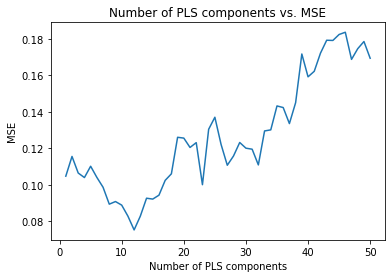

In [24]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(x, y_d13c_max, 50)


In [25]:
opt_Xc_d13c_max.shape

(321, 100)

In [26]:
y_d13c_max.shape

(321, 2)

In [27]:
x.shape

(321, 319)

In [28]:
x1_d13c_max = opt_Xc_d13c_max[0:80,:]
x2_d13c_max = opt_Xc_d13c_max[80:160,:]
x3_d13c_max = opt_Xc_d13c_max[160:240,:]
x4_d13c_max = opt_Xc_d13c_max[240:480,:]

y1_d13c_max = y_d13c_max[0:80,:]
y2_d13c_max = y_d13c_max[80:160,:]
y3_d13c_max = y_d13c_max[160:240,:]
y4_d13c_max = y_d13c_max[240:480,:]

In [ ]:
def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

In [29]:
y_d13c_max.shape

(321, 2)

In [30]:
opt_Xc_d13c_max.shape

(321, 100)

R2 calib: 0.626
R2 CV: 0.330
MSE calib: 0.038
MSE CV: 0.068
0.28656795172573274 0.4449692717388276
None
0 site1b 0.4033661009780012 [-0.16889351333467983 'pn_site1b_08_027.tif']
1 site1b 0.4710726216401895 [0.07153747786546072 'pn_site1b_09_028.tif']
2 site1b 0.3613427814617951 [0.10575706433407639 'pn_site1b_09_030.tif']
3 site1b -0.06061223380739533 [0.44905294036526167 'pn_site1b_12_029.tif']
4 site1b 0.6717060270479078 [0.5088806779554205 'pn_site1b_12_035.tif']
5 site1b -0.2108040630126935 [0.07719370433148764 'pn_site1b_14_023.tif']
6 site1b 1.0198266389491546 [0.7473550223138781 'pn_site1b_14_053.tif']
7 site1b 0.47825614729580224 [0.07035464982999384 'pn_site1b_15_022.tif']
8 site1b 0.5823080328644079 [0.5113662261943732 'pn_site1b_16_041.tif']
9 site1b 0.2679784667980205 [-0.3633021947839361 'pn_site1b_17_038.tif']
10 site1b 0.8319393625200706 [0.6916584026435895 'pn_site1b_17_043.tif']
11 site1b 0.822080856770929 [0.6971407602586592 'pn_site1b_17_045.tif']
12 site1b 0.5339159

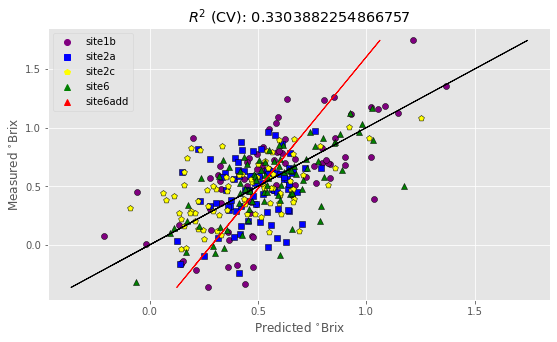

In [31]:
file_name_d13c_mean = r'E:\wenqu\trait_map\update6\csv\pn_ymax.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

In [50]:
optimal_pls_pn  = PLSRegression(n_components=12)
optimal_pls_pn.fit(opt_Xc_d13c_max, y_d13c_max[:, 0].astype(np.float64))


coefficients_pn = optimal_pls_pn.coef_.flatten()
bands_pn = band_name[sorted_ind_d13c_max][wav_d13c_max:]

print(coefficients_pn.shape, bands_pn.shape)

bands_pn

(100,) (100,)


array(['band_136', 'band_328', 'band_256', 'band_373', 'band_354',
       'band_238', 'band_95', 'band_180', 'band_98', 'band_162',
       'band_19', 'band_246', 'band_374', 'band_60', 'band_17',
       'band_152', 'band_347', 'band_171', 'band_281', 'band_83',
       'band_35', 'band_273', 'band_116', 'band_49', 'band_107',
       'band_160', 'band_99', 'band_340', 'band_222', 'band_388',
       'band_253', 'band_349', 'band_258', 'band_117', 'band_285',
       'band_178', 'band_277', 'band_64', 'band_245', 'band_121',
       'band_128', 'band_104', 'band_38', 'band_66', 'band_120',
       'band_84', 'band_224', 'band_24', 'band_386', 'band_134',
       'band_22', 'band_139', 'band_369', 'band_144', 'band_330',
       'band_21', 'band_241', 'band_274', 'band_146', 'band_149',
       'band_96', 'band_87', 'band_177', 'band_259', 'band_252',
       'band_350', 'band_167', 'band_137', 'band_127', 'band_71',
       'band_106', 'band_220', 'band_262', 'band_344', 'band_150',
       'band_4

In [51]:
coefficients_pn

array([-0.6954484 , -0.10707128,  0.29687797, -0.10837724,  0.37943271,
       -0.46223281,  0.50267049,  0.47033713,  0.35204473, -0.26572347,
        0.29721539,  0.31599217,  0.43575187, -0.32522129,  0.35999205,
       -0.41638179, -0.08396977, -0.38872152,  0.4735162 , -0.47600237,
        0.71217823, -0.47564913,  0.15783851, -0.54106878,  0.16520962,
       -0.63698955, -0.24984628, -0.36768186, -0.19923757, -0.28708522,
        0.51150446, -0.34289883,  0.40433792, -0.20963747, -0.31824712,
       -0.33263974,  0.79374099,  0.24713917,  0.29310543, -0.4298687 ,
        0.30617848, -0.64839982, -0.3111285 ,  0.28553578,  0.49902452,
       -0.73789959,  0.69298391,  0.18839012,  0.58714069,  0.55920612,
       -0.51672048,  0.22883365, -0.42282912, -0.59044061,  0.72794077,
       -0.38063897, -0.58687205,  0.42884836, -0.62442842,  0.40919028,
        0.37196882,  0.18049652, -0.42454758,  0.40467094,  0.35183174,
       -0.35633542,  0.51858083,  0.46692861,  0.26498506, -0.66

In [52]:
optimal_pls_pn.intercept_

array([0.50674851])

# d13 std

(321, 319)
2% completed(321, 319)
4% completed(321, 319)
6% completed(321, 319)
8% completed(321, 319)
10% completed(321, 319)
12% completed(321, 319)
14% completed(321, 319)
16% completed(321, 319)
18% completed(321, 319)
20% completed(321, 319)
22% completed(321, 319)
24% completed(321, 319)
26% completed(321, 319)
28% completed(321, 319)
30% completed(321, 319)
32% completed(321, 319)
34% completed(321, 319)
36% completed(321, 319)
38% completed(321, 319)
40% completed(321, 319)
42% completed(321, 319)
44% completed(321, 319)
46% completed(321, 319)
48% completed(321, 319)
50% completed(321, 319)
52% completed(321, 319)
54% completed(321, 319)
56% completed(321, 319)
58% completed(321, 319)
60% completed(321, 319)
62% completed(321, 319)
64% completed(321, 319)
66% completed(321, 319)
68% completed(321, 319)
70% completed(321, 319)
72% completed(321, 319)
74% completed(321, 319)
76% completed(321, 319)
78% completed(321, 319)
80% completed(321, 319)
82% completed(321, 319)
84% compl

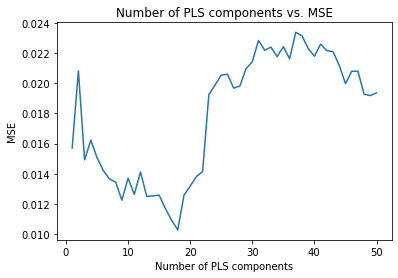

In [26]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 50)

# opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(x, y_d13c_max, 50)

In [27]:
x1_d13c_std = opt_Xc_d13c_std[0:80,:]
x2_d13c_std = opt_Xc_d13c_std[80:160,:]
x3_d13c_std = opt_Xc_d13c_std[160:240,:]
x4_d13c_std = opt_Xc_d13c_std[240:440,:]

y1_d13c_std = y_d13c_std[0:80,:]
y2_d13c_std = y_d13c_std[80:160,:]
y3_d13c_std = y_d13c_std[160:240,:]
y4_d13c_std = y_d13c_std[240:480,:]

R2 calib: 0.769
R2 CV: 0.577
MSE calib: 0.005
MSE CV: 0.010
0.23796504676639738 0.6595216830190355
None
0 site1b 0.7652148576513522 [1.0407404311545758 'pn_site1b_08_027.tif']
1 site1b 0.7986240376723149 [0.7473681919241687 'pn_site1b_09_028.tif']
2 site1b 0.9800819974935228 [1.1261510867369593 'pn_site1b_09_030.tif']
3 site1b 0.5868553857713887 [0.6686712105875593 'pn_site1b_12_029.tif']
4 site1b 0.7336331703150969 [0.736051605114924 'pn_site1b_12_035.tif']
5 site1b 0.6890696354973834 [0.7068015263899842 'pn_site1b_14_023.tif']
6 site1b 0.9141888353120777 [0.7212783713219353 'pn_site1b_14_053.tif']
7 site1b 0.8055736048471719 [0.9920104710047206 'pn_site1b_15_022.tif']
8 site1b 0.7192237895726128 [0.7271910490459782 'pn_site1b_16_041.tif']
9 site1b 0.8923682735082417 [0.8977770704129437 'pn_site1b_17_038.tif']
10 site1b 0.7439717323164066 [1.016994975542105 'pn_site1b_17_043.tif']
11 site1b 0.6830580991011406 [0.7815165286739167 'pn_site1b_17_045.tif']
12 site1b 0.727027263076842 [0.6

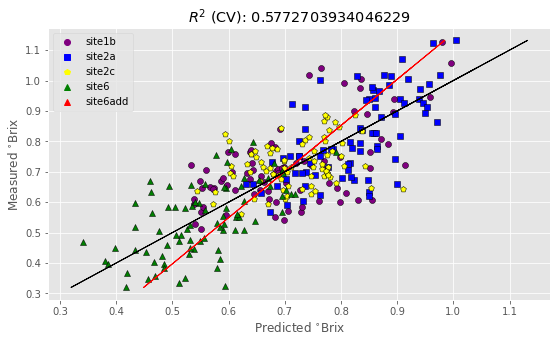

In [28]:
file_name_d13c_std = r'E:\wenqu\trait_map\update6\csv\pn_std.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

In [29]:
optimal_pls_pn  = PLSRegression(n_components=18)
optimal_pls_pn.fit(opt_Xc_d13c_std, y_d13c_std[:, 0].astype(np.float64))


coefficients_pn = optimal_pls_pn.coef_.flatten()
bands_pn = band_name[sorted_ind_d13c_std][wav_d13c_std:]


In [30]:
coefficients_pn

array([-0.52677111,  0.2393862 , -0.34374593,  0.04617479, -0.3235944 ,
       -0.12615458, -0.101187  ,  0.21465114, -0.09730263, -0.40850316,
       -0.19569988, -0.13153615,  0.3007576 , -0.25759803,  0.2245228 ,
        0.08264624, -0.51851155, -0.25125866, -0.71039098,  0.31828452,
        0.24293902,  0.14959705, -0.27197564, -0.02087283,  0.0110643 ,
       -0.2699177 , -0.43486487, -0.25435858, -0.38663737, -0.30551053,
       -0.26271402, -0.11751413,  0.27928267, -0.16617031,  0.19045142,
        0.30051279,  0.2095173 , -0.29999342,  0.27630265,  0.20042527,
        0.4430025 , -0.09926915, -0.29889024,  0.41068336,  0.44055208,
        0.30629204, -0.38155385, -0.44550736,  0.35170106,  0.42186891,
        0.20111858,  0.18158854,  0.40362382,  0.26917808,  0.14961739,
        0.50013175,  0.38897765, -0.37716373,  0.1432618 ,  0.39586506,
        0.34759167,  0.08690073, -0.44362097, -0.57848108,  0.62961805])

In [33]:
bands_pn.shape

(65,)

In [32]:
optimal_pls_pn.intercept_

array([0.6993347])